617. 合并二叉树

给你两棵二叉树： root1 和 root2 。

想象一下，当你将其中一棵覆盖到另一棵之上时，两棵树上的一些节点将会重叠（而另一些不会）。你需要将这两棵树合并成一棵新二叉树。合并的规则是：如果两个节点重叠，那么将这两个节点的值相加作为合并后节点的新值；否则，不为 null 的节点将直接作为新二叉树的节点。

返回合并后的二叉树。

注意: 合并过程必须从两个树的根节点开始。


示例 1：

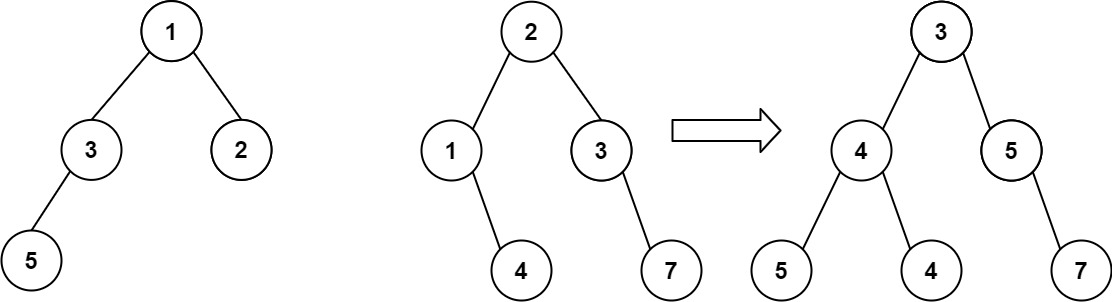

输入：root1 = [1,3,2,5], root2 = [2,1,3,null,4,null,7]
输出：[3,4,5,5,4,null,7]
示例 2：

输入：root1 = [1], root2 = [1,2]
输出：[2,2]
 

提示：

两棵树中的节点数目在范围 [0, 2000] 内
-104 <= Node.val <= 104

和遍历一个树逻辑是一样的，只不过传入两个树的节点，同时操作。本题使用哪种遍历都是可以的！

In [ ]:
# 递归

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def mergeTrees(self, root1: TreeNode, root2: TreeNode) -> TreeNode:
        # 递归终止条件: 
        #  但凡有一个节点为空, 就立刻返回另外一个. 如果另外一个也为None就直接返回None. 
        if not root1: 
            return root2
        if not root2: 
            return root1
        # 上面的递归终止条件保证了代码执行到这里root1, root2都非空. 
        root1.val += root2.val # 中
        root1.left = self.mergeTrees(root1.left, root2.left) #左
        root1.right = self.mergeTrees(root1.right, root2.right) # 右
        
        return root1 # ⚠️ 注意: 本题我们重复使用了题目给出的节点而不是创建新节点. 节省时间, 空间. 


In [ ]:
from collections import deque

# 迭代
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def mergeTrees(self, root1: TreeNode, root2: TreeNode) -> TreeNode:
        if not root1: 
            return root2
        if not root2: 
            return root1

        queue = deque()
        queue.append(root1)
        queue.append(root2)

        while queue: 
            node1 = queue.popleft()
            node2 = queue.popleft()
            # 更新queue
            # 只有两个节点都有左节点时, 再往queue里面放.
            if node1.left and node2.left: 
                queue.append(node1.left)
                queue.append(node2.left)
            # 只有两个节点都有右节点时, 再往queue里面放.
            if node1.right and node2.right: 
                queue.append(node1.right)
                queue.append(node2.right)

            # 更新当前节点. 同时改变当前节点的左右孩子. 
            node1.val += node2.val
            if not node1.left and node2.left: 
                node1.left = node2.left
            if not node1.right and node2.right: 
                node1.right = node2.right

        return root1

## 二叉搜索树中的搜索

给定二叉搜索树（BST）的根节点 root 和一个整数值 val。

你需要在 BST 中找到节点值等于 val 的节点。 返回以该节点为根的子树。 如果节点不存在，则返回 null 。

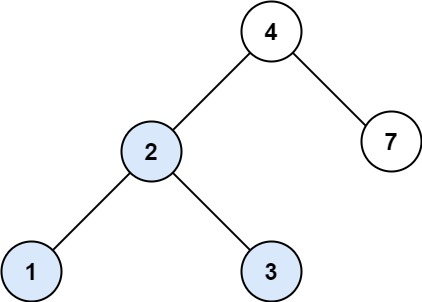

输入：root = [4,2,7,1,3], val = 2
输出：[2,1,3]

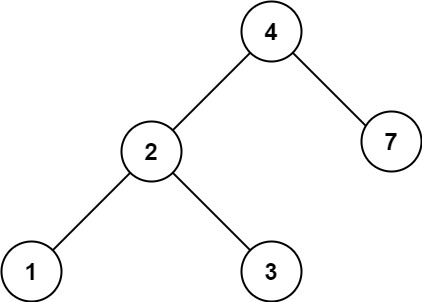

输入：root = [4,2,7,1,3], val = 5
输出：[]

In [ ]:
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if root is None:
            return None
        if val == root.val:
            return root
        return self.searchBST(root.left if val < root.val else root.right, val)

## 验证二叉搜索树

给你一个二叉树的根节点 root ，判断其是否是一个有效的二叉搜索树。

有效 二叉搜索树定义如下：

节点的左子树只包含 严格小于 当前节点的数。
节点的右子树只包含 严格大于 当前节点的数。
所有左子树和右子树自身必须也是二叉搜索树。

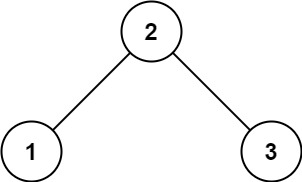

输入：root = [2,1,3]
输出：true

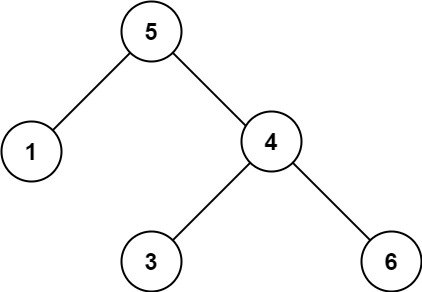

输入：root = [5,1,4,null,null,3,6]
输出：false
解释：根节点的值是 5 ，但是右子节点的值是 4


In [ ]:
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        # 中序遍历
        # 递归终止条件
        if not root:
            return True
        
        # 递归遍历左子树
        if not self.isValidBST(root.left):
            return False
        
        # 检查当前节点值是否大于前一个节点值
        if root.val <= self.prev:
            return False
        
        # 如果左子树是二叉搜索树，则更新pre，继续遍历右子树
        self.prev = root.val
        
        # 递归遍历右子树
        return self.isValidBST(root.right)

## 二叉搜索树的最小绝对差

给你一个二叉搜索树的根节点 root ，返回 树中任意两不同节点值之间的最小差值 。

差值是一个正数，其数值等于两值之差的绝对值。



示例 1：

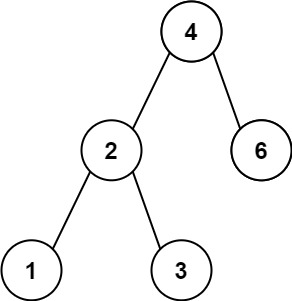

输入：root = [4,2,6,1,3]
输出：1


示例 2：

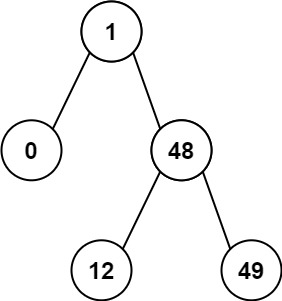

输入：root = [1,0,48,null,null,12,49]
输出：1



In [ ]:
# 最直观的想法，就是把二叉搜索树转换成有序数组，然后遍历一遍数组，就统计出来最小差值了。
# 遇到在二叉搜索树上求什么最值，求差值之类的，都要思考一下二叉搜索树可是有序的，要利用好这一特点。

# 因为中序序列天然有序，最小差值一定出现在相邻元素之间。

# 方法1, 转化为数列求差值

class Solution:
    def __init__(self):
        self.vec = []

    def traversal(self, root):
        if root is None:
            return
        self.traversal(root.left)
        self.vec.append(root.val)  # 将二叉搜索树转换为有序数组
        self.traversal(root.right)

    def getMinimumDifference(self, root):
        self.vec = []
        self.traversal(root)
        if len(self.vec) < 2:
            return 0
        result = float('inf')
        for i in range(1, len(self.vec)):
            # 统计有序数组的最小差值
            result = min(result, self.vec[i] - self.vec[i - 1])
        return result
    

# 中序遍历

class Solution:
    def __init__(self):
        self.result = float('inf')
        self.pre = None

    def traversal(self, cur):
        if cur is None:
            return
        self.traversal(cur.left)  # 左
        if self.pre is not None:  # 中
            self.result = min(self.result, cur.val - self.pre.val)
        self.pre = cur  # 记录前一个
        self.traversal(cur.right)  # 右

    def getMinimumDifference(self, root):
        self.traversal(root)
        return self.result


# 我想记录遍历过程中遇到的最小差值, 这样可行吗


## 知识点: 中序遍历输出的序列天然有序，最小差值一定出现在相邻元素之间

你的问题可以这么理解：

在一个\*\*二叉搜索树（BST）\*\*里，中序遍历得到的序列是严格递增的，也就是说这个序列就是从小到大排好的数列。比如：

```
      4
     / \
    2   6
   / \
  1   3
```

中序遍历得到的结果是：`[1, 2, 3, 4, 6]`。

---

### 为什么“最小差值一定出现在相邻元素之间”？

设有序数组是：`a1 < a2 < a3 < ... < an`。

* 两个不相邻的元素，比如 `ai` 和 `aj`（其中 j > i+1），它们之间的差是：

  ```
  aj - ai = (aj - a_{j-1}) + (a_{j-1} - a_{j-2}) + ... + (a_{i+1} - ai)
  ```

  这是多个正数相加，必然 ≥ 中间某一段的差值。
* 换句话说：**非相邻元素之间的差值一定大于等于某两个相邻元素的差值**。

因此，在有序序列里，要找最小差值，只需要看相邻元素的差就够了，不可能出现在跨越的元素之间。

---

### 举个例子

有序数组：`[1, 2, 3, 10]`

* 相邻差值：
  `2-1=1`, `3-2=1`, `10-3=7`
  最小差值 = 1
* 如果去看非相邻：
  `10-1=9`, `10-2=8`, `10-3=7`，都比 1 大。

所以答案确实一定出现在相邻差值里。

---

👉 总结一下你问的那句话：
**因为 BST 的中序遍历结果是递增有序的，所以最小差值只可能在相邻的两个数之间出现，检查非相邻的数没有意义。**


## 二叉搜索树中的众数

给定一个有相同值的二叉搜索树（BST），找出 BST 中的所有众数（出现频率最高的元素）。

假定 BST 有如下定义：

结点左子树中所含结点的值小于等于当前结点的值
结点右子树中所含结点的值大于等于当前结点的值
左子树和右子树都是二叉搜索树

例如：

给定 BST [1,null,2,2],


返回[2].

提示：如果众数超过1个，不需考虑输出顺序

进阶：你可以不使用额外的空间吗？（假设由递归产生的隐式调用栈的开销不被计算在内）

In [ ]:
# 中序遍历

# 只有这样, 所有遍历的元素才是有序的

# 思路一: 先遍历一遍统计出最大的频次, 然后再遍历一遍统计出所有频次等于最大频次的元素: 用双指针方法, 一个指针指向当前值, 一个指针去寻找相同值, 加入counter, 如果count与maxcount相同, 就放进结果集

class Solution:
    def findMode(self, root: Optional[TreeNode]) -> List[int]:
        

## 知识点: 状态转移思想, 确定局部状态最优解, 动态更新

这个双指针妙的地方主要还是在思想，类似于动态规划的状态转移，并不等到全部遍历完才确定maxCount，而是每次遍历都确定目前已遍历序列的maxCount，因为下次遍历是在目前序列的基础上，所以下次maxCount的状态可以由目前转移过去，总的来说就是一个状态迭代的思想。
状态迭代的思想很关键，总是能确定局部最优解，在处理海量数据以及分布式数据时能实时给出局部最优结果，并且有较低的时间复杂度。

并不是遍历两次, 而是动态统计和更新max count, 一旦当前发现的maxcount大于已经记录的maxcount, 则更新maxcount值, 清空结果数组. 
之后把新的maxcount的值放进新的result集中

但我的问题是, 更新maxcount后, 之前的统计结果不也清空了吗, 如果之前的数又继续出现, 他们不久被忘记了吗

关键点在于 **中序遍历有序**，而且相同值一定是成“连续一段”（一个 run）出现。
因此，当你从某个值 v 的那一段连续节点走到下一个不同值时，就可以当场最终定稿地比较这段 v 的频次与 maxCount，并据此清空/追加结果。之后 v 不会再出现，所以不会“被忘记”。

## 知识点: 中序遍历二叉搜索树等于遍历有序数组

In [ ]:
# 利用二叉搜索树中序遍历有序性质

class Solution:
    def __init__(self):
        self.maxCount = 0  # 最大频率
        self.count = 0  # 统计频率
        self.pre = None
        self.result = []

    def searchBST(self, cur):
        if cur is None:
            return

        self.searchBST(cur.left)  # 左
        # 中
        if self.pre is None:  # 第一个节点
            self.count = 1
        elif self.pre.val == cur.val:  # 与前一个节点数值相同
            self.count += 1
        else:  # 与前一个节点数值不同
            self.count = 1
        self.pre = cur  # 更新上一个节点

        if self.count == self.maxCount:  # 如果与最大值频率相同，放进result中
            self.result.append(cur.val)

        if self.count > self.maxCount:  # 如果计数大于最大值频率
            self.maxCount = self.count  # 更新最大频率
            self.result = [cur.val]  # 很关键的一步，不要忘记清空result，之前result里的元素都失效了

        self.searchBST(cur.right)  # 右
        return

    def findMode(self, root):
        self.count = 0
        self.maxCount = 0
        self.pre = None  # 记录前一个节点
        self.result = []

        self.searchBST(root)
        return self.result


In [ ]:
# 另一种方法: 递归过程中 利用字典 hashmap 存储所有结果, 最后输出最大的, 但这个需要额外空间

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import defaultdict

class Solution:
    def searchBST(self, cur, freq_map):
        if cur is None:
            return
        freq_map[cur.val] += 1  # 统计元素频率
        self.searchBST(cur.left, freq_map)
        self.searchBST(cur.right, freq_map)

    def findMode(self, root):
        freq_map = defaultdict(int)  # key:元素，value:出现频率
        result = []
        if root is None:
            return result
        self.searchBST(root, freq_map)
        max_freq = max(freq_map.values())
        for key, freq in freq_map.items():
            if freq == max_freq:
                result.append(key)
        return result


## 二叉树的最近公共祖先

给定一个二叉树, 找到该树中两个指定节点的最近公共祖先。

百度百科中最近公共祖先的定义为：“对于有根树 T 的两个节点 p、q，最近公共祖先表示为一个节点 x，满足 x 是 p、q 的祖先且 x 的深度尽可能大（一个节点也可以是它自己的祖先）。”

 

示例 1：

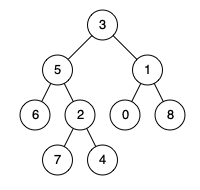

输入：root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1

输出：3

解释：节点 5 和节点 1 的最近公共祖先是节点 3 。


示例 2：

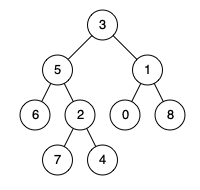

输入：root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4

输出：5

解释：节点 5 和节点 4 的最近公共祖先是节点 5 。因为根据定义最近公共祖先节点可以为节点本身。


示例 3：

输入：root = [1,2], p = 1, q = 2

输出：1
 

提示：

树中节点数目在范围 [2, 105] 内。
-109 <= Node.val <= 109
所有 Node.val 互不相同 。
p != q
p 和 q 均存在于给定的二叉树中。
 


## 知识点: 二叉树自底向上查找

利用二叉树回溯从底到上查找

二叉树的后序遍历就是回溯



In [ ]:
class Solution:
    def lowestCommonAncestor(self, root, p, q):
        if root == q or root == p or root is None:
            return root

        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)

        if left is not None and right is not None:
            return root

        if left is None and right is not None:
            return right
        elif left is not None and right is None:
            return left
        else: 
            return None


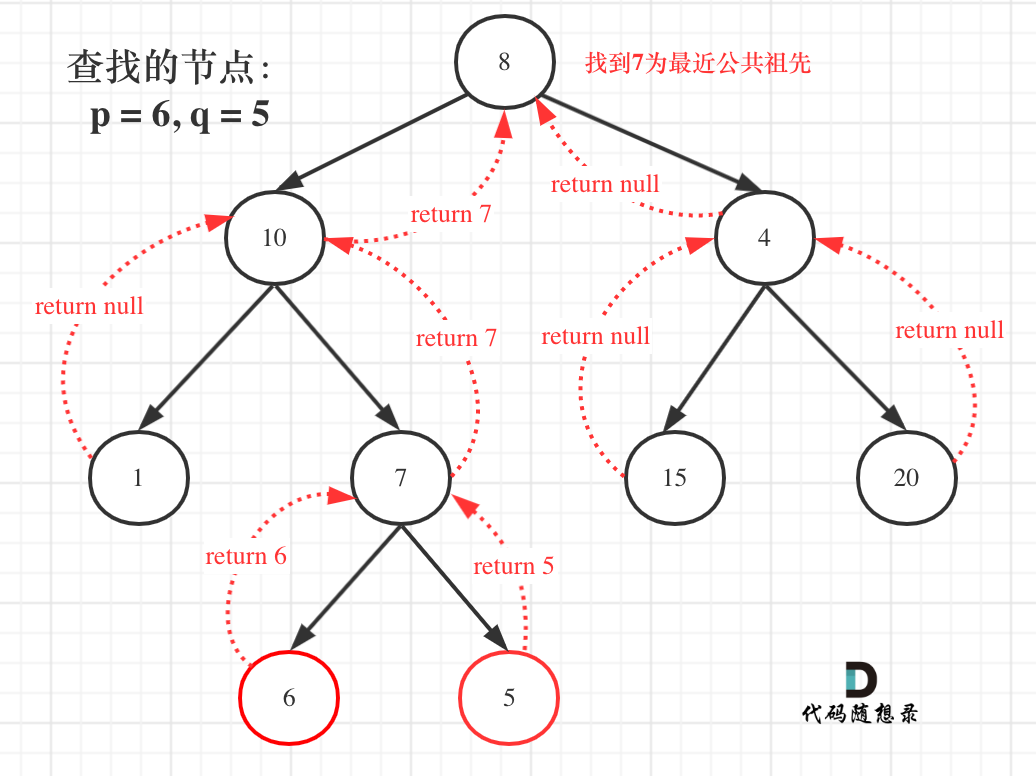

从底往上, 一旦指针交汇了, 就找到公共祖先了

虽然二叉树只能从上往下遍历, 但是可以利用回溯从下往上处理结果

判断 左子树有没有出现 p 或 q, 如果出现了, 则往上回溯, 一旦交汇

回溯就是 左右中, 然后 返回的过程 中 在最前, 也就是加入处理逻辑

